# 03_Exploratory Data Analysis_Hospital Length Of Stay

## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
%matplotlib inline
#rcParams['figure.figsize']=10,8
sns.set()
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

In [3]:
#df=pd.read_csv('LengthOfStay.csv')
df=pd.read_csv('LengthOfStay_new.csv') # it contains LOS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [5]:
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay,LOS
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3,1-3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7,4-7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3,1-3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1,1-3
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4,4-7


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
eid,100000.0,50000.500000,28867.657797,1.000000,25000.750000,50000.500000,75000.250000,100000.000000
dialysisrenalendstage,100000.0,0.036420,0.187334,0.000000,0.000000,0.000000,0.000000,1.000000
asthma,100000.0,0.035270,0.184462,0.000000,0.000000,0.000000,0.000000,1.000000
irondef,100000.0,0.094940,0.293134,0.000000,0.000000,0.000000,0.000000,1.000000
pneum,100000.0,0.039450,0.194664,0.000000,0.000000,0.000000,0.000000,1.000000
substancedependence,100000.0,0.063060,0.243072,0.000000,0.000000,0.000000,0.000000,1.000000
psychologicaldisordermajor,100000.0,0.239040,0.426499,0.000000,0.000000,0.000000,0.000000,1.000000
depress,100000.0,0.051660,0.221341,0.000000,0.000000,0.000000,0.000000,1.000000
psychother,100000.0,0.049390,0.216682,0.000000,0.000000,0.000000,0.000000,1.000000
fibrosisandother,100000.0,0.004790,0.069044,0.000000,0.000000,0.000000,0.000000,1.000000


Text(0.5, 1.0, 'length of stay (days at Hospital)')

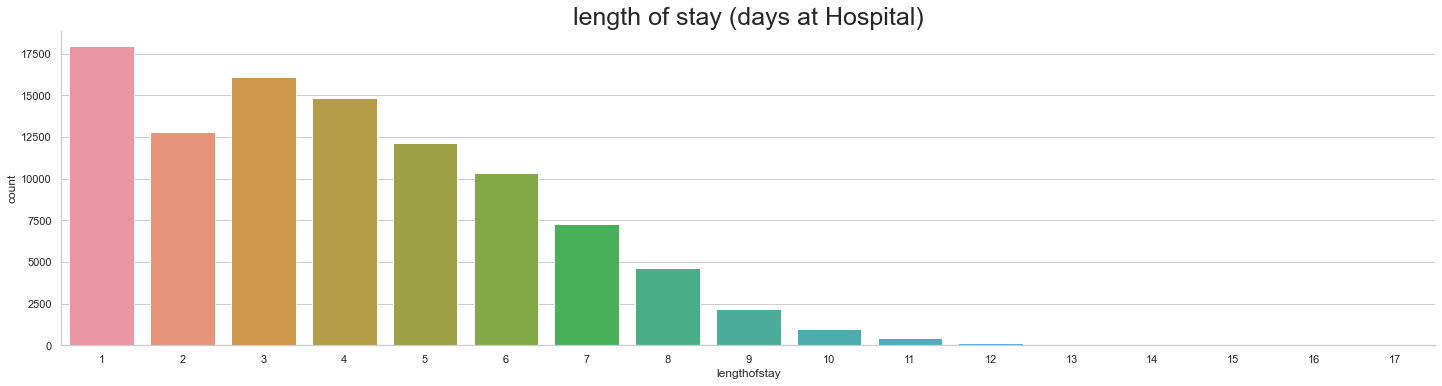

In [7]:
pl = sns.factorplot('lengthofstay',data=df, aspect=4, kind='count')
pl.set_xticklabels()
plt.title('length of stay (days at Hospital)', size=25)

Text(0.5, 1.0, 'Days (LOS)')

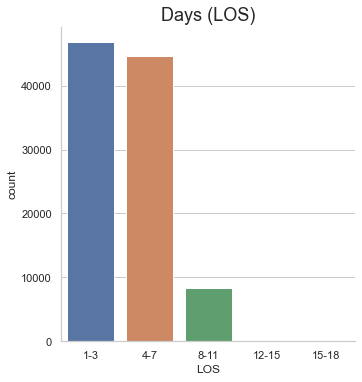

In [14]:
sns.factorplot('LOS',data=df,kind='count')
plt.title('Days (LOS)', size=18)

In [15]:
df.LOS.value_counts(ascending=False, normalize=True)

1-3      0.46872
4-7      0.44563
8-11     0.08296
12-15    0.00259
15-18    0.00010
Name: LOS, dtype: float64

In [8]:
#we know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1-1.5IQR or Q3+1.5IQR are consider as outlier
# Analysis on lengthofstay feature
Q1=df.lengthofstay.quantile(.25)
Q3=df.lengthofstay.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",df.lengthofstay.min())
print("Max Value ",df.lengthofstay.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 1
Max Value  17
Q1  2.0
Q3  6.0
IQR  4.0
lower_limit -4.0
upper_limit 12.0


## Analysis of continous variables

In [9]:
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

def plotchart(col):
    fix, (ax1,ax2) =plt.subplots(1,2,figsize=(7,5))
    sns.boxplot(col, orient='v',ax=ax1)
    ax1.set_ylabel=col.name
    ax1.set_title('Box plot of {}'.format(col.name))
    sns.distplot(col,ax=ax2) 
    ax2.set_title('Distribution plot of {}'.format(col.name))
    
def analysis_column(col):
    print('count of outlier ', len(findoutliers(col)))
    print('Mean ',format(col.mean()))
    print('Median ',format(col.median()))
    print('Missing values',format(col.isnull().sum()))
    print('% of Missing values',format(round(100*(col.isnull().sum()/len(col)),2)))
    
    plotchart(col)

In [10]:
findoutliers(df.lengthofstay)

array([13, 13, 13, 14, 13, 13, 13, 14, 13, 17, 13, 13, 13, 13, 14, 13, 16,
       13, 13, 13, 13, 14, 13, 13, 13, 14, 13, 13, 14, 13, 13, 15, 13, 16,
       14, 14, 13, 13, 14, 13, 15, 13, 13, 13, 13, 14, 13, 13, 13, 14, 15,
       13, 14, 13, 15, 13, 13, 15, 13, 16, 13, 17, 13, 13, 13, 14, 13, 14,
       15, 13, 15, 13, 14, 13, 14, 13, 17, 13, 14, 13, 15, 16, 13, 13, 16,
       13, 15, 14, 13, 14, 14, 15, 14, 14, 13, 14, 13, 15, 14, 13, 14, 13,
       15, 13, 13, 13, 13, 13, 14, 13, 15, 13, 16, 13, 13, 14, 15, 13, 13,
       15, 17, 13, 14, 13, 14, 13, 13, 14, 13, 13, 14, 15])

In [11]:
print(len(findoutliers(df.lengthofstay))) #no of rows having outlier

132


<AxesSubplot:>

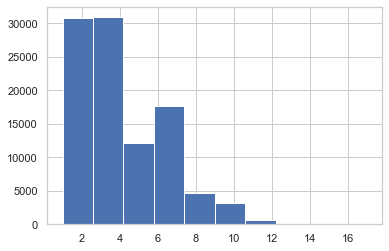

In [12]:
df.lengthofstay.hist()

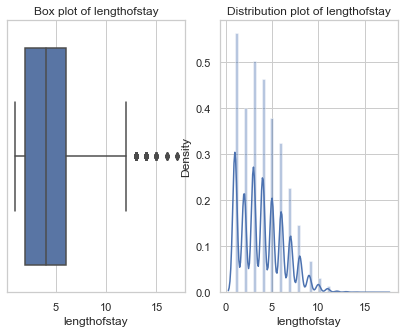

In [13]:
plotchart(df.lengthofstay)

## Analysis of Caegorical Variables

## Bivariate Analysis